# Tu primer árbol de decisión con scikit-learn

In [1]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [2]:
#Cargamos dataset a utilizar
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


## Exploración de datos

In [3]:
#Visualizacion del DataFrame
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Eliminamos las columnas que aportan poco al analisis. La columna **Name** es una de ellas y la columna **Fare** tambien ya que arroja informacion duplicada debido a su relacion con la clase social.

In [4]:
#Eliminamos las columnas que no nos interesan

# enlistamos las variables que vamos a eliminar
columns_drop = ['Name', 'Fare']

# aplicamos la funcion drop y le pasamos la lista
df.drop(columns_drop, axis='columns', inplace=True)

# verificamos que se hayn eliminado las columnas 
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [5]:
#Renombramos las columnas
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

# verificamos el renombramiento de las variables
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [6]:
#Analizamos el shape del objeto
df.shape

(887, 6)

In [7]:
#Visualizamos los tipos de datos
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [8]:
#Cambiamos los tipos de datos
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [9]:
df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male      uint8
dtype: object

In [10]:
#Renombrar una variable del DataFrame
df.rename(columns={'Sex_male': 'Sex'}, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [11]:
#Ordenar columnas por variable
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Entrenamiento de árbol de decisión con scikit-learn

In [12]:
#Separamos en X e y

# variables predictoras
X = df.drop('Survived', axis=1)

# variable target
y = df.Survived

In [19]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split    # separacion de la data

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)

In [20]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

Como poseemos pocos registros utilizamos una profundidad de 2 para evitar que el modelo se sobre ajuste. Si contamos con mayor cantidad de datos, la profundidad debe ser mayor

In [21]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Evaluación del modelo

In [22]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [23]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)

El accuracy en train es:  0.8048387096774193
El accuracy en test es:  0.7640449438202247


La cercania entre ambos valores indican que nuestro modelo posee una performance adecuada tanto en el entrenamiento como en el test

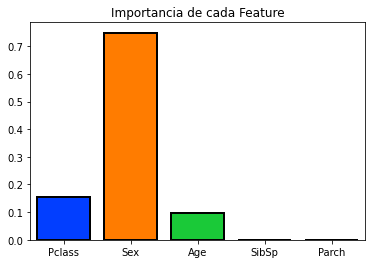

In [25]:
#Verificamos el feature importances
import seaborn as sns

# almacena la importancia de cada features en una variable
importances = tree.feature_importances_

# guardar el nombre de las variables features
columns = X.columns

data = pd.DataFrame([importances], columns=columns)

# Grafico
sns.barplot(data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature');

Esta metrica nos permite entender la importancia que tiene cada una de nuestros features a la hora de realizar el modelo de clasificacion

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 